## Visualizations
In this notebook, we will examine the relationship between a teams' average height, experience, and the times they made it to the NCAA tournament through a series of Seaborn visualizations.

In [92]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd
import numpy as np

In [146]:
sns.set_theme()
clean2013 = pd.read_csv("Clean Postseason Data/2013_CLEAN_with_postseason.csv")
clean2014 = pd.read_csv("Clean Postseason Data/2014_CLEAN_with_postseason.csv")
clean2015 = pd.read_csv("Clean Postseason Data/2015_CLEAN_with_postseason.csv")
clean2016 = pd.read_csv("Clean Postseason Data/2016_CLEAN_with_postseason.csv")
clean2017 = pd.read_csv("Clean Postseason Data/2017_CLEAN_with_postseason.csv")
clean2018 = pd.read_csv("Clean Postseason Data/2018_CLEAN_with_postseason.csv")
clean2019 = pd.read_csv("Clean Postseason Data/2019_CLEAN_with_postseason.csv")
clean2019

,School,Avg_Height,Avg_Experience,Postseason
0,abilene christian,76.0,2.0,1
1,air force,77.0,1.5,0
2,akron,76.0,1.5,0
3,alabama,78.0,1.8,0
4,alabama am,76.0,0.8,0
...,...,...,...,...
341,wright state,77.0,1.9,0
342,wyoming,78.0,0.9,0
343,xavier,79.0,1.5,0
344,yale,77.0,1.9,1


## Overall

In [161]:
all_clean = clean2013.merge(clean2014,on = 'School',suffixes=('_2013','_2014'))
all_clean = all_clean.merge(clean2015,on = 'School',suffixes=('_2015','_2015'))
all_clean = all_clean.merge(clean2016,on = 'School',suffixes=('_2015','_2016'))
all_clean = all_clean.merge(clean2017,on = 'School',suffixes=('_2016','_2017'))
all_clean = all_clean.merge(clean2018,on = 'School',suffixes=('_2017','_2018'))
all_clean = all_clean.merge(clean2019,on = 'School',suffixes=('_2018','_2019'))

all_clean['AverageHeight'] = ((all_clean['Avg_Height_2013'] + all_clean['Avg_Height_2014'] + all_clean['Avg_Height_2015'] + all_clean['Avg_Height_2016'] + all_clean['Avg_Height_2017'] + all_clean['Avg_Height_2018'] + all_clean['Avg_Height'])/7)
all_clean['AverageExperience'] = ((all_clean['Avg_Experience_2013'] + all_clean['Avg_Experience_2014'] + all_clean['Avg_Experience_2015'] + all_clean['Avg_Experience_2016'] + all_clean['Avg_Experience_2017'] + all_clean['Avg_Experience_2018'] + all_clean['Avg_Experience'])/7)
all_clean['Times_to_Tournament'] = ((all_clean['Postseason_2013'] + all_clean['Postseason_2014'] + all_clean['Postseason_2015'] + all_clean['Postseason_2016'] + all_clean['Postseason_2017'] + all_clean['Postseason_2018'] + all_clean['Postseason']))

all_clean

,School,Avg_Height_2013,Avg_Experience_2013,Postseason_2013,Avg_Height_2014,Avg_Experience_2014,Postseason_2014,Avg_Height_2015,Avg_Experience_2015,Postseason_2015,...,Postseason_2017,Avg_Height_2018,Avg_Experience_2018,Postseason_2018,Avg_Height,Avg_Experience,Postseason,AverageHeight,AverageExperience,Times_to_Tournament
0,air force,77.0,2.2,0,77.0,1.5,0,77.0,1.6,0,...,0,77.0,1.9,0,77.0,1.5,0,76.857143,1.714286,0
1,akron,78.0,1.7,1,78.0,1.5,0,77.0,1.3,0,...,0,77.0,1.2,0,76.0,1.5,0,77.142857,1.542857,1
2,alabama,77.0,1.2,0,77.0,1.5,0,77.0,1.6,0,...,0,78.0,0.9,1,78.0,1.8,0,77.428571,1.442857,1
3,alabama am,75.0,1.4,0,75.0,2.1,0,77.0,1.0,0,...,0,75.0,0.9,0,76.0,0.8,0,75.571429,1.257143,0
4,albany-ny,76.0,2.0,1,77.0,1.6,1,77.0,1.2,1,...,0,77.0,1.8,0,77.0,0.6,0,76.857143,1.471429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,wright state,76.0,1.1,0,76.0,2.2,0,76.0,1.2,0,...,0,77.0,1.4,1,77.0,1.9,0,76.571429,1.585714,1
312,wyoming,76.0,1.0,0,76.0,1.7,0,77.0,2.1,1,...,0,78.0,1.8,0,78.0,0.9,0,77.142857,1.471429,1
313,xavier,77.0,1.7,0,77.0,1.4,1,77.0,1.6,1,...,1,78.0,1.8,1,79.0,1.5,0,77.714286,1.628571,5
314,yale,77.0,1.5,0,78.0,1.6,0,77.0,2.2,0,...,0,77.0,1.2,0,77.0,1.9,1,77.285714,1.700000,2


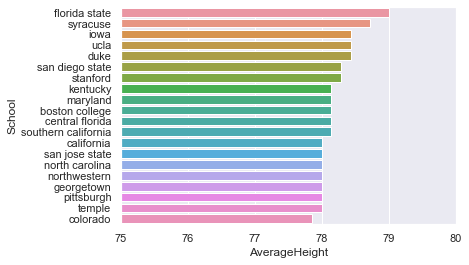

In [138]:
cleaned_sorted = all_clean.sort_values(by=['AverageHeight'],ascending = False)
cleaned_sorted
average_height_plot = sns.barplot(x="AverageHeight",y='School', data=cleaned_sorted[:20])
average_height_plot = average_height_plot.set_xlim([cleaned_sorted['AverageHeight'].min(), cleaned_sorted['AverageHeight'].max() + 1])


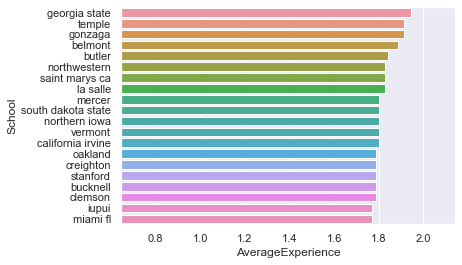

In [168]:
cleaned_sorted_experience = all_clean.sort_values(by=['AverageExperience'],ascending = False)
avg_exp_plot = sns.barplot(x="AverageExperience",y='School', data=cleaned_sorted_experience[:20])
avg_exp_plot = avg_exp_plot.set_xlim([cleaned_sorted['AverageExperience'].min(), cleaned_sorted['AverageExperience'].max()+.2])

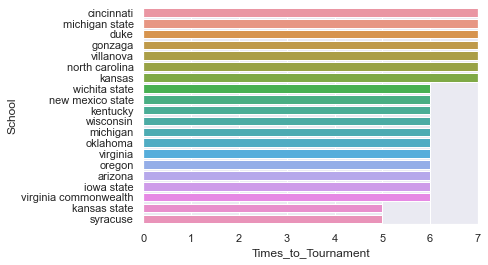

In [167]:
cleaned_tournament = all_clean.sort_values(by=['Times_to_Tournament'],ascending = False)
avg_exp_plot = sns.barplot(x="Times_to_Tournament",y='School', data=cleaned_tournament[:20])
avg_exp_plot = avg_exp_plot.set_xlim([cleaned_tournament['Times_to_Tournament'].min(), cleaned_tournament['Times_to_Tournament'].max()])

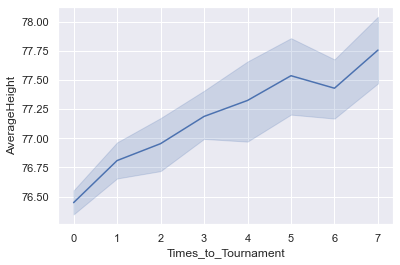

In [201]:
height_tournament = sns.lineplot(data=all_clean,x="Times_to_Tournament",y="AverageHeight")

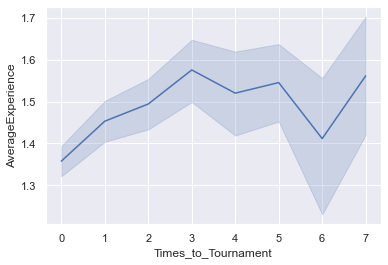

In [200]:
experience_tournament = sns.lineplot(data=all_clean,x="Times_to_Tournament",y="AverageExperience")

## 2013 Visualization

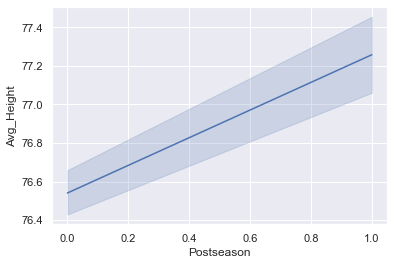

In [188]:
height_tournament_2013 = sns.lineplot(data=clean2013,x="Avg_Height",y="Postseason)

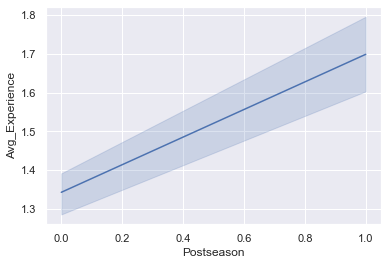

In [189]:
exp_2013 = sns.lineplot(data=clean2013,x="Postseason",y="Avg_Experience")

## 2014 Visualization

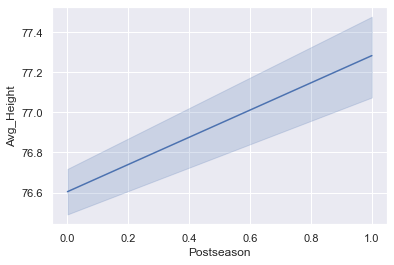

In [186]:
height_2014 = sns.lineplot(data=clean2014,x="Postseason",y="Avg_Height")

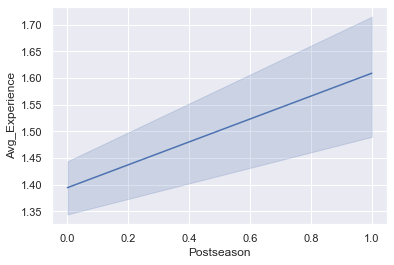

In [185]:
exp_2014 = sns.lineplot(data=clean2014,x="Postseason",y="Avg_Experience")

## 2015 Visualization

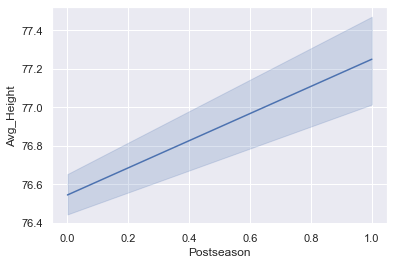

In [190]:
height_2015 = sns.lineplot(data=clean2015,x="Postseason",y="Avg_Height")

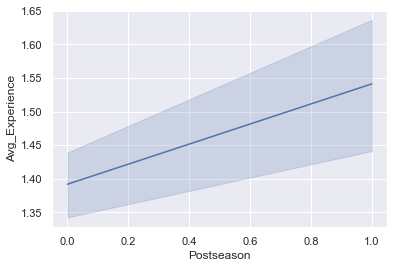

In [191]:
exp_2015 = sns.lineplot(data=clean2015,x="Postseason",y="Avg_Experience")

## 2016 Visualization

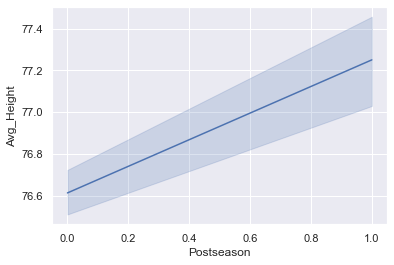

In [192]:
height_2016 = sns.lineplot(data=clean2016,x="Postseason",y="Avg_Height")

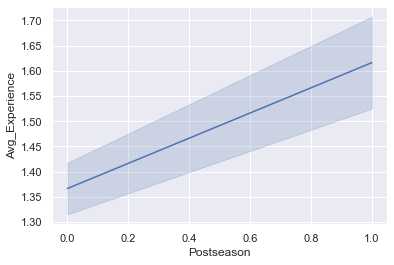

In [193]:
exp_2016 = sns.lineplot(data=clean2016,x="Postseason",y="Avg_Experience")

## 2017 Visualization

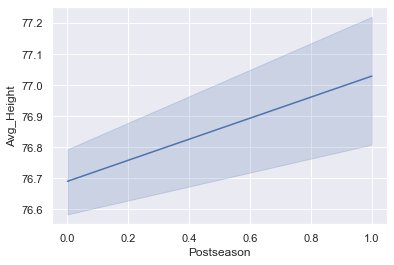

In [194]:
height_2017 = sns.lineplot(data=clean2017,x="Postseason",y="Avg_Height")

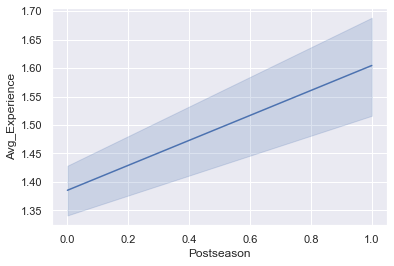

In [195]:
exp_2017 = sns.lineplot(data=clean2017,x="Postseason",y="Avg_Experience")

## 2018 Visualization

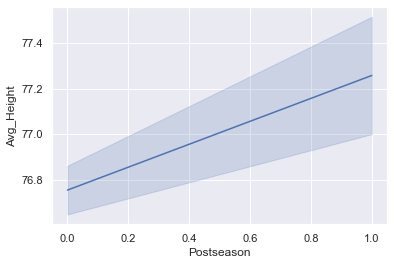

In [196]:
height_2018 = sns.lineplot(data=clean2018,x="Postseason",y="Avg_Height")

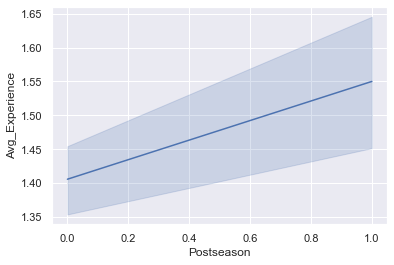

In [197]:
exp_2018 = sns.lineplot(data=clean2018,x="Postseason",y="Avg_Experience")

## 2019 Visualization

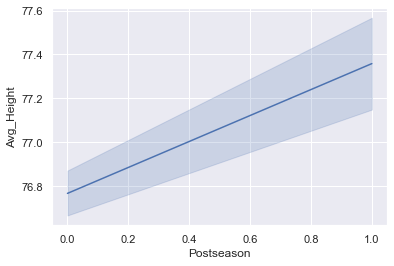

In [198]:
height_2019 = sns.lineplot(data=clean2019,x="Postseason",y="Avg_Height")

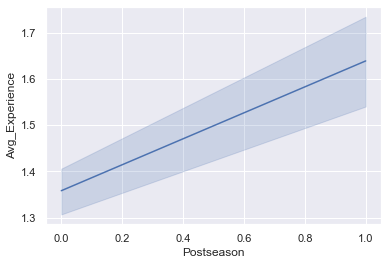

In [199]:
exp_2019 = sns.lineplot(data=clean2019,x="Postseason",y="Avg_Experience")

## Conclusion

There is a clear, direct relationship between Average Experience and number of times the team makes it to postseason. In the overall graphs, you can notice the constant upward trend in height and experience positively correlated to the number of times the team has made it to the tournament. Additionally, thorughout the individual years, the trend proves to be consistent.